# Module 4: Searching an Image  -  Binary Image Analysis -  Recursion
****

<img src="Graphics/search_1.png">

<img src="Graphics/search_2.png">

In [34]:
#Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Saving an image. 0 for grayscale. 1 for color. -1 for color with a alpha channel. 
img = cv2.imread('Graphics/image2.png',0)

#How many elements are in that data. 
print(img.size)

#What is the shape of the array.
print(img.shape)

#What type are the elements.
print(img.dtype)

#What is the first element
print(img[0][0])

#Print my data
print(img)

225
(15, 15)
uint8
255
[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255   0 255 255 255 255 255 255 255   0 255 255 255]
 [255 255   0   0   0 255 255 255 255 255   0   0   0 255 255]
 [255 255 255   0 255 255 255 255 255 255 255   0 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255   0 255 255 255 255 255 255 255   0 255 255 255]
 [255 255 255   0 255 255 255 255 255 255 255   0 255 255 255]
 [255 255 255   0 255 255 255 255 255 255 255   0 255 255 255]
 [255 255 255   0   0   0   0   0   0   0   0   0 255 255 255]
 [255 255 255 255   0   0   0   0   0   0   0 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]]


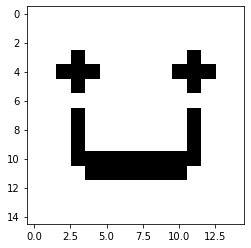

In [48]:
plt.imshow(img, cmap="gray")

In [35]:
# Convert to 0 and 1 and keep as an integer. 
img = np.uint8(img/255)

In [36]:
print(img)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1 1 0 1 1 1]
 [1 1 0 0 0 1 1 1 1 1 0 0 0 1 1]
 [1 1 1 0 1 1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1 1 0 1 1 1]
 [1 1 1 0 1 1 1 1 1 1 1 0 1 1 1]
 [1 1 1 0 1 1 1 1 1 1 1 0 1 1 1]
 [1 1 1 0 0 0 0 0 0 0 0 0 1 1 1]
 [1 1 1 1 0 0 0 0 0 0 0 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


## Results

+ 1 represents absence of material indicated by light passing.
+ 0 represents material which light has not passed. 


In [47]:
# Let's make arrays out of all the external corners.  Sepearte Varialbes to illustrate.   Excercise:  Make them 3D arrays to start.
exCorner1 = np.array([[[1,1],[1,0]]])
exCorner2 = np.array([[[1,1],[0,1]]])
exCorner3 = np.array([[[1,0],[1,1]]])
exCorner4 = np.array([[[0,1],[1,1]]])

# Combine all the external corners into one array.
exCorner = np.concatenate((exCorner1,exCorner2,exCorner3,exCorner4), axis=0)
print("The first external corner is:")
print(exCorner[0])

# Let's make arrays out of all the internal corners.
inCorner1 = np.array([[[0,0],[0,1]]])
inCorner2 = np.array([[[0,0],[1,0]]])
inCorner3 = np.array([[[0,1],[0,0]]])
inCorner4 = np.array([[[1,0],[0,0]]])

# Combine all the internal corners into one array.
inCorner = np.concatenate((inCorner1,inCorner2, inCorner3, inCorner4), axis=0)
print("The first internal corner is:")
print(inCorner[0])

# Write the function to search the image for the number of holes. 
def count_holes(img):
    
    #Save the height and width.
    h = img.shape[0]
    w = img.shape[1]

    # variables to return the external and internal corner counts
    e = 0
    i = 0

    #For each row in our grid. y = row
    for y in range(0,h-1):
        #Search each pixel in the row. x = pixel
        for x in range(0,w-1):

            curFrame = np.array([[img[y,x],img[y,x + 1]],[img[y+1,x],img[y+1,x+1]]])

            # check to see if the arrays are equal.
            for n in range(0,4):
                
                if(np.array_equal(exCorner[n], curFrame)):
                    e += 1
                if(np.array_equal(inCorner[n], curFrame)):
                    i += 1

    return(np.uint8((e-i)/4))


number_of_holes = count_holes(img)
print("Number of holes:",number_of_holes)

# frame = np.array([[img[y,x],img[y,x + 1]],[img[y+1,0],img[y+1,x+1]]])
# print(frame)



The first external corner is:
[[1 1]
 [1 0]]
The first internal corner is:
[[0 0]
 [0 1]]
Number of holes: 3


In [39]:
x = 2
y = 2

frame = np.array([[img[y,x],img[y,x + 1]],[img[y+1,x],img[y+1,x+1]]])
print(frame)

[[1 1]
 [1 0]]


<img src="Graphics/search_3.png">

<img src="Graphics/search_4.png">

<img src="Graphics/search_5.png">

### Implement the recursive connected compoments algorithm 